In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


from warnings import filterwarnings
filterwarnings('ignore')

# Data Collection & Processing

In [165]:
# loading the data from csv file to a Pandas DataFrame
calories=pd.read_csv(r"F:\Imarticus online PGA22\Imarticus project\project_dataset\calories.csv")
calories.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [166]:
exercise=pd.read_csv(r"F:\Imarticus online PGA22\Imarticus project\project_dataset\exercise.csv")
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [167]:
# Combining the two Dataframes in single dataframe
df= pd.concat([exercise, calories['Calories']], axis=1)

In [168]:
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [169]:
# checking the number of rows and columns
df.shape

(15000, 9)

In [170]:
# get some statistical measures about the data
df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [171]:
# getting some informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [172]:
# checking for missing values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [173]:
#getting columns from the data
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

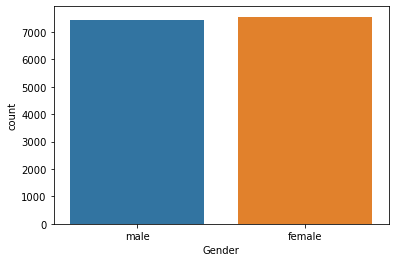

In [174]:
# Data Visualization
# plotting the gender column in count plot

sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

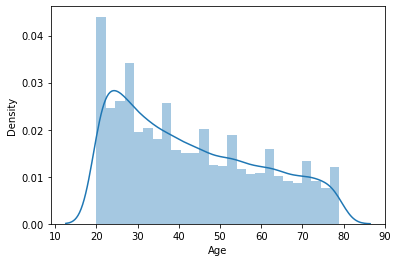

In [175]:
# finding the distribution of "Age" column

sns.distplot(df['Age'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

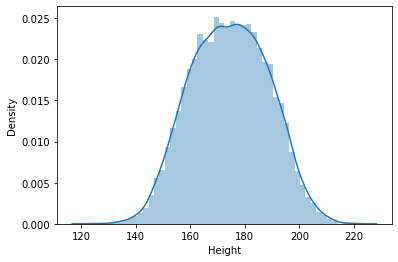

In [176]:
# finding the distribution of "Height" column

sns.distplot(df['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

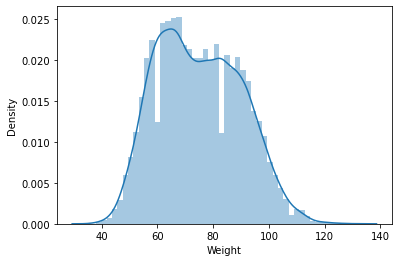

In [177]:
# finding the distribution of "Weight" column

sns.distplot(df['Weight'])

In [178]:
import plotly.express as px
fig=px.histogram(df,x="Calories",nbins=50,histnorm='density')
fig.show()

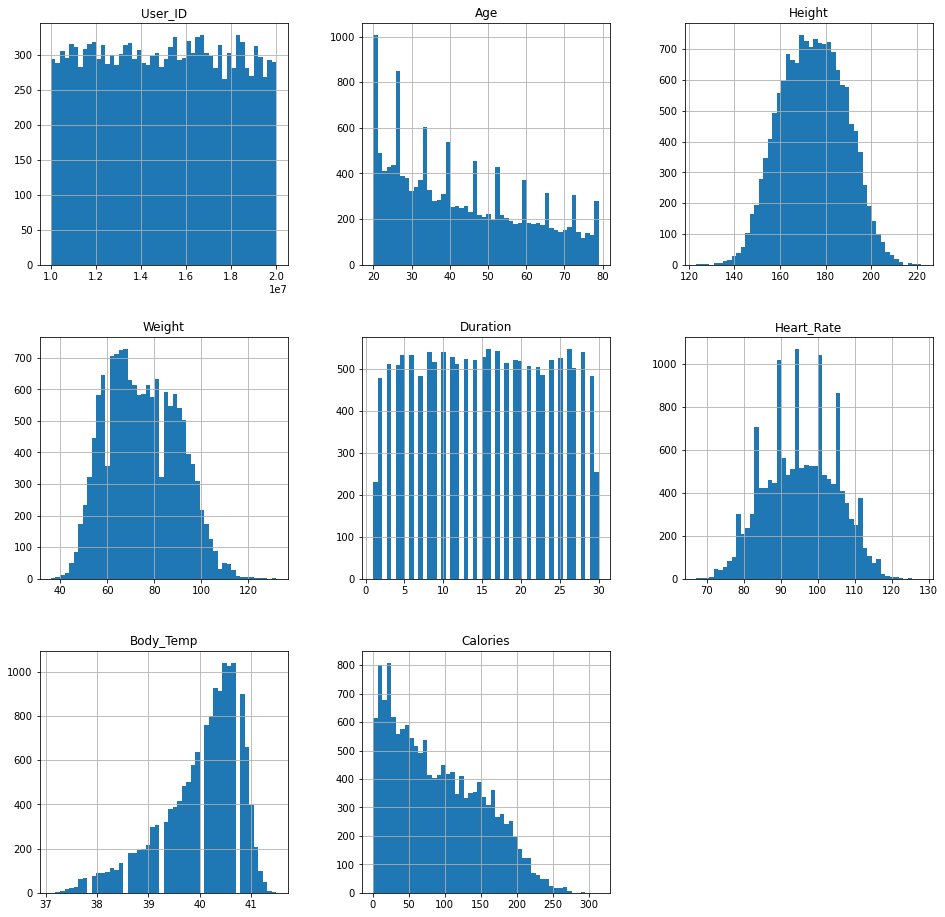

In [179]:
df.hist(bins=50,figsize=(16,16))
plt.show()

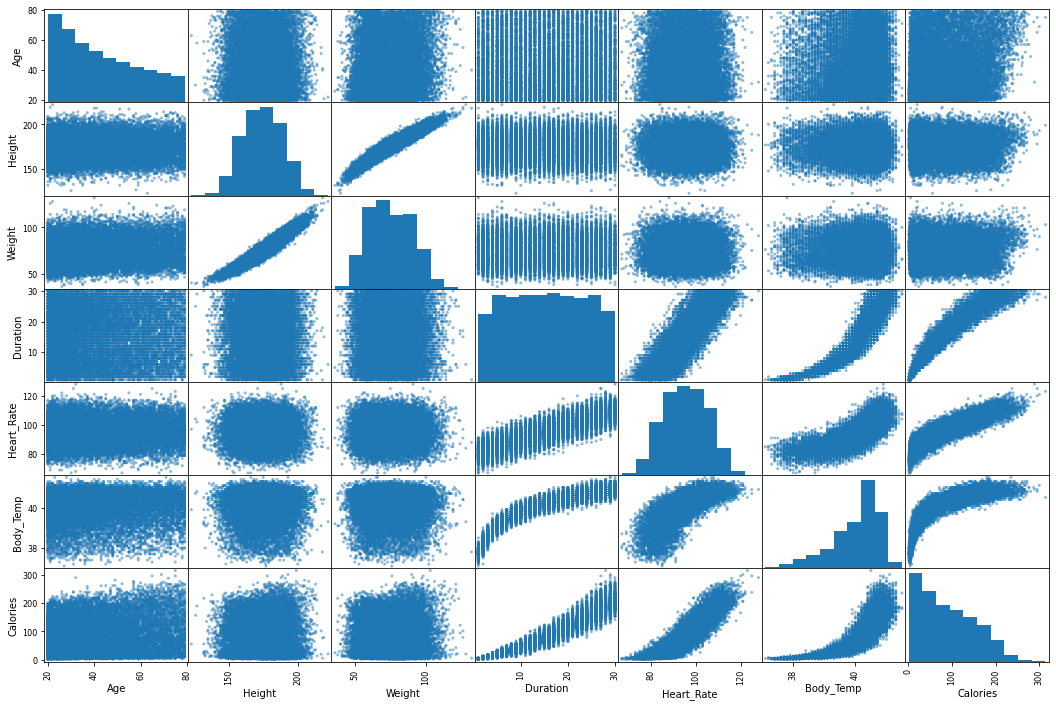

In [180]:
from pandas.plotting import scatter_matrix
att = ['Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']
scatter_matrix(df[att],figsize=(18,12))
plt.show()

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

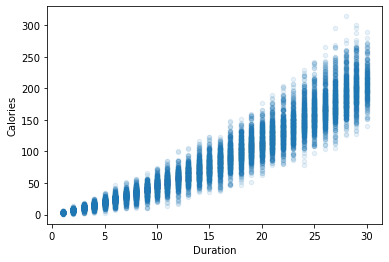

In [181]:
# get the calories and duration plotting
df.plot(kind='scatter',x ="Duration" , y = 'Calories' ,alpha=0.1)

In [182]:
# Finding the Correlation in the dataset
# 1 positive correlation
# 2 negaitive correlation

correlation = df.corr()
correlation

User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   

            Body_Temp  Calories  
User_ID      0.000923 -0.001661  
Age          0.013175  0.154395  
Height       0.001200  0.017537  
Weight       0.004095  0.035481  
Duration     0.903167  0.955421  
Heart_Rate   0.771529  0.897882  
Body_Temp    1.000000  0.824558  
Calories     0.824558  1.000000

In [183]:
cor_df = df.corr()
cor_df['Calories'].sort_values(ascending=False)

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Height        0.017537
User_ID      -0.001661
Name: Calories, dtype: float64

<AxesSubplot:>

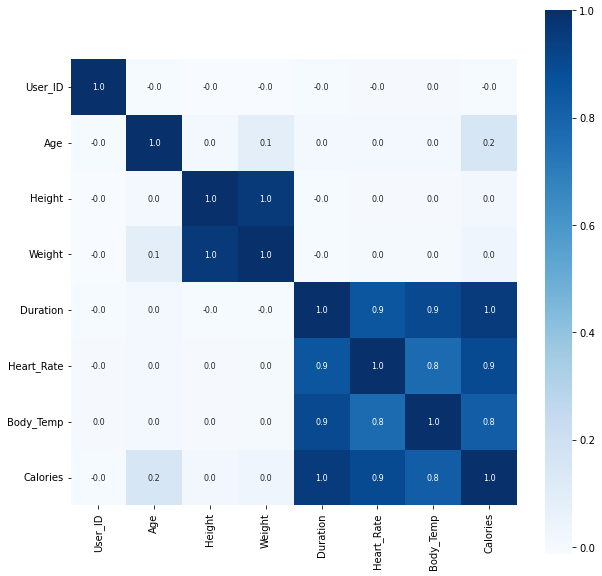

In [184]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [185]:
# Converting the text data to numerical values
df.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [186]:
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [212]:
#Separating features and Target

features=['Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp']

x=df.loc[:,features]
y=df.loc[:,['Calories']]

#Splitting the data into training data and Test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [188]:
x

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]

In [189]:
y

Calories
0         231.0
1          66.0
2          26.0
3          71.0
4          35.0
...         ...
14995      45.0
14996      23.0
14997      75.0
14998      11.0
14999      98.0

[15000 rows x 1 columns]

In [190]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [191]:
df

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1      14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2      11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3      16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4      17771927       1   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082       1   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577       1   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188       1   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037       0   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526       0   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0         231.0  
1          66.0  
2          26.0  
3          71.0  
4          35.0  
...         ...  
14995      45.0  
14996      23.0  
14997      75.0  
14998      11.0  
14999      98.0  

[15000 rows x 9 columns]

# Using XGBoost Regressor

In [192]:
# Model Training

model = XGBRegressor()

In [193]:
# training the model with X_train

model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [194]:
# Evaluation

# Prediction on Test Data

y_pred= model.predict(x_test)
y_pred

array([ 39.761425,  15.444147, 101.12049 , ...,  27.884388, 147.57295 ,
       158.49583 ], dtype=float32)

In [195]:
#Mean Absolute Error

mae = metrics.mean_absolute_error(y_test,y_pred)

In [196]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.511337571144104


In [197]:
# R-squre
rss = metrics.r2_score(y_test, y_pred)
print('R square score = ', rss)

R square score =  0.998801753229742


In [198]:
print('R2_Score ',metrics.r2_score(y_test,y_pred))
print('RMSE ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MSE',(mean_squared_error(y_test,y_pred)))
print('MAE',np.sqrt(mean_absolute_error(y_test,y_pred)))

R2_Score  0.998801753229742
RMSE  2.1502555854284853
MSE 4.623599082666398
MAE 1.2293647022523886


In [215]:
import statsmodels.api as sm
X_addC = sm.add_constant(x)
result = sm.OLS(y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.9672011449723691 0.9671858306723962


In [199]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)
Acc_Score_train_XG=xg.score(x_train,y_train)
Acc_Score_test_XG=xg.score(x_test,y_test)

In [200]:
print("Accuracy of XGBoost_Train:",Acc_Score_train_XG)
print("Accuracy of XGBoost_Test:",Acc_Score_test_XG)

Accuracy of XGBoost_Train: 0.9995305069187743
Accuracy of XGBoost_Test: 0.998801753229742


# Using linear regression 

In [88]:
# Visualizing the effect of exercise minutes on calories burned
df['Intercept'] = 1
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories  Intercept  
0     231.0          1  
1      66.0          1  
2      26.0          1  
3      71.0          1  
4      35.0          1

Text(0.5, 1.0, 'Calories burned vs Duration of Exercise')

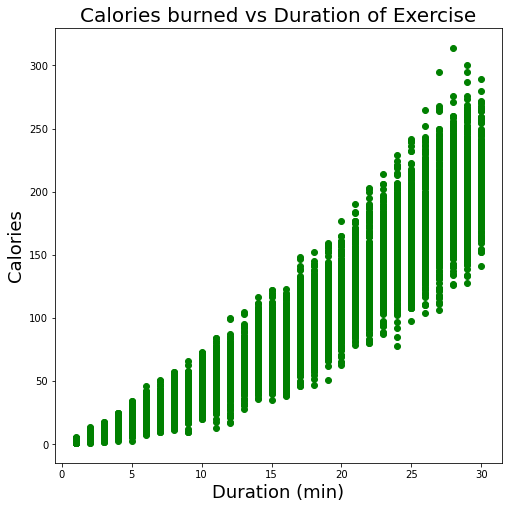

In [89]:
plt.figure(figsize=(8, 8))
plt.plot(df['Duration'], df['Calories'], 'go')
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18)
plt.title('Calories burned vs Duration of Exercise', size = 20)

In [90]:
# Now let's create the feature and response variable
X = df.loc[:, ['Intercept', 'Duration']]
y = df.loc[:, 'Calories']

In [91]:
# First implementing the linear regression without using any libraries
def linear_regression(X,y):
    coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    return coeffs

by_hand_coefs = linear_regression(X.values, y.values)
print('Intercept without using library:', by_hand_coefs[0])
print('Slope without using library: ', by_hand_coefs[1])

Intercept without using library: -21.859656399672435
Slope without using library:  7.1728838379074675


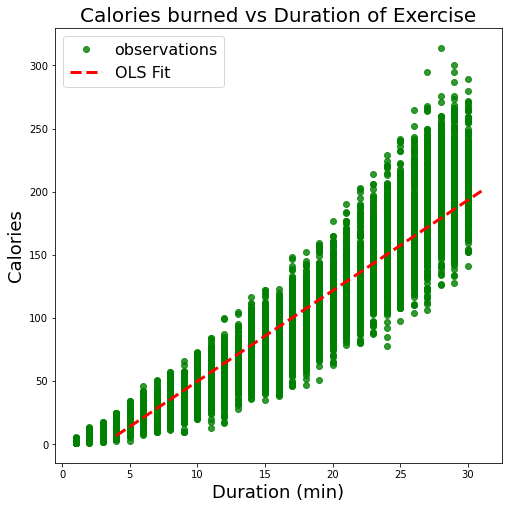

In [92]:
xs = np.linspace(4, 31, 1000)
ys = by_hand_coefs[0] + by_hand_coefs[1] * xs

plt.figure(figsize=(8, 8))

plt.plot(df['Duration'], df['Calories'], 'go',label = 'observations', alpha = 0.8);
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.plot(xs, ys, 'r--', label = 'OLS Fit', linewidth = 3)
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [93]:
# Let's predict something
print(f'Exercising for 35.5 minutes will burn an estimated \
{np.round((by_hand_coefs[0] + by_hand_coefs[1] * 35.5), 2)} calories')

Exercising for 35.5 minutes will burn an estimated 232.78 calories


In [94]:
# Implementing linear regression with the help of the library
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(np.array(X.Duration).reshape(-1, 1), y)
print('Intercept using library:', linear_regression.intercept_)
print('Slope using library:', linear_regression.coef_[0])

Intercept using library: -21.859656399672403
Slope using library: 7.172883837907469


In [201]:
fig=px.scatter(df,x='Age',y='Calories',trendline='ols',title='Relationship between Age and Calories (R2-Score is 0.02)')
fig.show()

In [202]:
# model

from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [203]:
x_reduced=df[['Age']]
y=df['Calories']

x_train,x_test,y_train,y_test=train_test_split(x_reduced,y,test_size=0.3)

lin_model=LinearRegression()
lin_model.fit(x_train,y_train)
pred_lin=lin_model.predict(x_test)

print('R2_Score ',r2_score(y_test,pred_lin))
print('RMSE ',np.sqrt(mean_squared_error(y_test,pred_lin)))
print('MSE',(mean_squared_error(y_test,pred_lin)))
print('MAE ',np.sqrt(mean_absolute_error(y_test,pred_lin)))

R2_Score  0.023657696411511497
RMSE  61.804265657824324
MSE 3819.767253502923
MAE  7.251808414349332


In [204]:
fig=px.scatter(df,x='Duration',y='Calories',trendline='ols',title='Relationship between Duration and Calories (R2 Score is 0.91)')
fig.show()

In [211]:
x_reduced=df[['Duration']]
y=df['Calories']

x_train,x_test,y_train,y_test=train_test_split(x_reduced,y,test_size=0.3)

pred_lin=lin_model.predict(x_test)

print('R2_Score ',r2_score(y_test,pred_lin))
print('RMSE ',np.sqrt(mean_squared_error(y_test,pred_lin)))
print('MSE',(mean_squared_error(y_test,pred_lin)))
print('MAE ',np.sqrt(mean_absolute_error(y_test,pred_lin)))

R2_Score  0.9137629279623506
RMSE  18.412223729602278
MSE 339.0099826689292
MAE  3.683031821335185


In [206]:
y_train.shape

(10500,)

In [207]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df=pd.DataFrame()

df['Gender_Encoded']=pd.get_dummies(df['Gender'],drop_first=True)
x=df.drop(['User_ID','Gender','Calories'],axis=1)

sc=StandardScaler()
x_scaled=sc.fit_transform(x)

vif_df['features']=x.columns

vif_df['vif']=[variance_inflation_factor(x_scaled,i) for i in range(len(x.columns))]

vif_df

features        vif
0             Age   1.124743
1          Height  14.276551
2          Weight  18.651715
3        Duration   8.059147
4      Heart_Rate   3.669456
5       Body_Temp   5.427428
6  Gender_Encoded   2.818870

In [84]:
x=df[['Duration']]
y=df['Calories']

x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)

fig=px.scatter(x=predictions,y=model.resid,title='Residual errors plot')
fig.update_layout(xaxis=dict(title='Predictions'),
                 yaxis=dict(title='Residuals'))

In [86]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.compat import lzip
x=model.model.exog
y=model.resid

goldfeldquant_test=het_goldfeldquandt(y,x,split=0.5)

lzip(["F statistic", "p-value"],goldfeldquant_test)

[('F statistic', 1.0393359316290913), ('p-value', 0.047428175907257515)]

In [1]:
# import statsmodels.formula.api as smf
# import statsmodels.stats.api as sms
# from statsmodels.formula.api import ols

# #f.groupby('Calories').mean()

# #results= ols('Calories' , data=df).FIT()
# results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)',data=df).fit()

# print(results.summary())

In [87]:
x=np.log(df[['Duration']])
y=np.log(df['Calories'])

x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)

fig=px.scatter(x=predictions,y=model.resid,title='Residual errors plot after log transformation')
fig.update_layout(xaxis=dict(title='Predictions'),
                 yaxis=dict(title='Residuals'))

In [90]:
x=model.model.exog
y=model.resid

goldfeldquant_test=het_goldfeldquandt(y,x,split=0.5)

lzip(["F statistic", "p-value"],goldfeldquant_test)

[('F statistic', 0.9935377109743004), ('p-value', 0.6105245124063482)]

In [92]:
from statsmodels.stats.stattools import durbin_watson

x=df[['Duration']]
y=df['Calories']

x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)

residuals=model.resid
print('Durbin Watson Test Statistic ',durbin_watson(residuals))

Durbin Watson Test Statistic  2.0054325441766516


In [93]:
fig=px.histogram(residuals,title='Histogram of residuals')
fig.update_layout(xaxis=dict(title='residuals'))
fig.show()

In [56]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)
Acc_Score_test_lin_model=lin_model.score(x_test,y_test)
Acc_Score_test_lin_model=lin_model.score(x_train,y_train)

In [57]:
print("Accuracy of LinearRegression_Train:",Acc_Score_train_lin_model)
print("Accuracy of Linearregression_Test:",Acc_Score_test_lin_model)

Accuracy of LinearRegression_Train: 0.9130076134268359
Accuracy of Linearregression_Test: 0.9130132533647307


In [46]:
# Score

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
Acc_Score_test_RF=rf.score(x_test,y_test)
Acc_Score_train_RF=rf.score(x_train,y_train)

In [47]:
print("Accuracy of Randomforest_Train:",Acc_Score_train_RF)
print("Accuracy of Randomforest_Test:",Acc_Score_test_RF)

Accuracy of Randomforest_Train: 0.9292833616825993
Accuracy of Randomforest_Test: 0.928246339403137
